### Problem Description

Transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. 
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
### https://www.kaggle.com/carrie1/ecommerce-data

## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Read Dataset

In [3]:
df = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## EDA

In [5]:
missing_percentage = df.isnull().sum()/ df.shape[0] * 100.00  ## Write your code here
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df = df.dropna() ## Write your code here

In [7]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

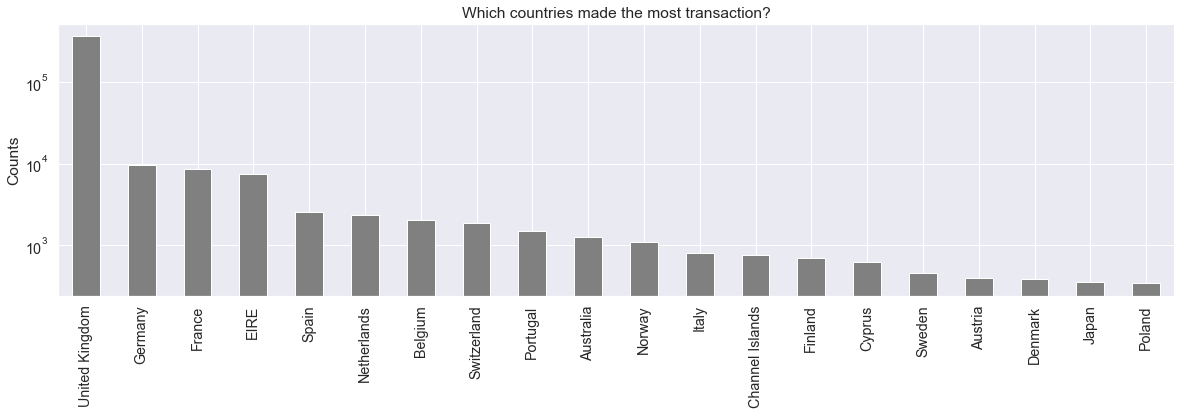

In [8]:
counts = df ['Country'].value_counts() 
counts[:20].plot(kind='bar', color = "gray", figsize = (20,5))
plt.yscale("log")  
plt.title("Which countries made the most transaction?")
plt.ylabel("Counts")
plt.show()

### Q2: Show the Top 10 Customers how made the largest Revenue

In [9]:
group = df['UnitPrice'].groupby(df['CustomerID'])
top_10 = group.sum().sort_values(ascending = False).head(10)

In [10]:
top_10

CustomerID
14096.0    41376.33
15098.0    40278.90
14911.0    31060.66
12744.0    25108.89
16029.0    24111.14
17841.0    20333.18
12748.0    15115.60
12536.0    13255.22
12757.0     8035.24
14606.0     7839.02
Name: UnitPrice, dtype: float64

### Q6: Calculate the Total Revenue for each Row

In [11]:
df['Revenue'] = df['Quantity']*df['UnitPrice']  ## Write your code here
df_top_10 = df[["CustomerID","Revenue"]].groupby("CustomerID").sum().sort_values(by='Revenue', ascending=False).head(10) ## Write your code here
df_top_10

,Revenue
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


### Q3: Show Top 5 frequent Customers

In [12]:
df_top_cust = pd.DataFrame(df[['CustomerID']].value_counts()[:5].sort_values(ascending=False),columns=['frequent']) ## Write your code here
df_top_cust

,frequent
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782


In [13]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

Text(0.5, 0, 'DescriptionLength')

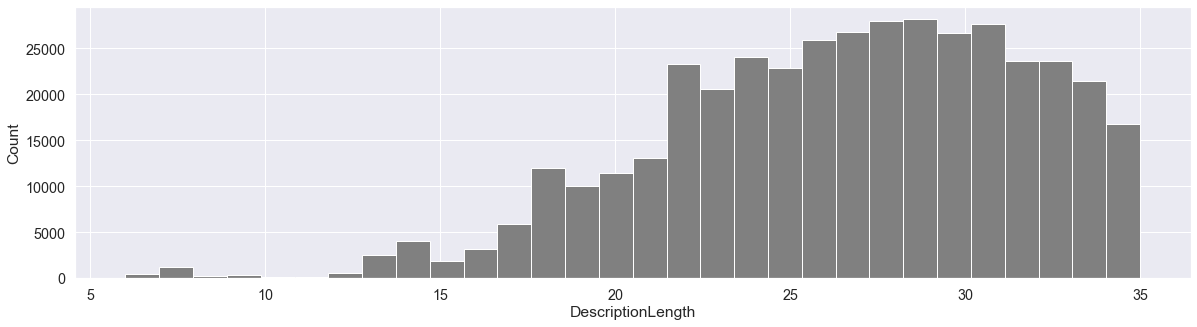

In [14]:
len1 = []
for i in df["Description"]:
    len1.append(len(i))

df["words"] = len1
df["words"].hist(figsize = (20,5) , color = "gray" ,bins = 30)
plt.ylabel("Count")
plt.xlabel("DescriptionLength") #Write your Code here

In [15]:
df1 = df[['Description']]
df1['totalwords'] = df1['Description'].str.len()

In [16]:
df1

,Description,totalwords
0,WHITE HANGING HEART T-LIGHT HOLDER,34
1,WHITE METAL LANTERN,19
2,CREAM CUPID HEARTS COAT HANGER,30
3,KNITTED UNION FLAG HOT WATER BOTTLE,35
4,RED WOOLLY HOTTIE WHITE HEART.,30
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,27
541905,CHILDREN'S APRON DOLLY GIRL,28
541906,CHILDRENS CUTLERY DOLLY GIRL,29
541907,CHILDRENS CUTLERY CIRCUS PARADE,31


### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [17]:
df["Year"] = df['InvoiceDate'].dt.year
df["Quarter"] = df['InvoiceDate'].dt.quarter
df["Month"] = df['InvoiceDate'].dt.month
df["Week"] = df['InvoiceDate'].dt.isocalendar().week
df["WeekDay"] = df['InvoiceDate'].dt.weekday
df["Day"] = df['InvoiceDate'].dt.day
df["Dayofyear"] = df['InvoiceDate'].dt.dayofyear
df["Date"] = df['InvoiceDate'].dt.to_period('D')

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,words,Year,Quarter,Month,Week,WeekDay,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,34,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,19,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,30,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,30,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [19]:
grouped_features = df[['Date','Year','Quarter','Month','Week','WeekDay','Dayofyear','Day','StockCode','Quantity','Revenue']]
grouped_features.head()

,Date,Year,Quarter,Month,Week,WeekDay,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,85123A,6,15.30
1,2010-12-01,2010,4,12,48,2,335,1,71053,6,20.34
2,2010-12-01,2010,4,12,48,2,335,1,84406B,8,22.00
3,2010-12-01,2010,4,12,48,2,335,1,84029G,6,20.34
4,2010-12-01,2010,4,12,48,2,335,1,84029E,6,20.34


In [20]:
grouped_features =grouped_features.groupby(['Date','Year','Quarter','Month','Week','WeekDay','Dayofyear','Day','StockCode']).sum()
grouped_features = grouped_features.reset_index(drop=False)
grouped_features.head()

,Date,Year,Quarter,Month,Week,WeekDay,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00
